# Que1: Occupations 

In [1]:
import pandas as pd

In [2]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

In [3]:
mean_age = users.groupby('occupation')['age'].mean()
print(mean_age)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [4]:
users['gender_num'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)
male_ratio = users.groupby('occupation')['gender_num'].mean().sort_values(ascending=False)
print(male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender_num, dtype: float64


# Que:2 Euro Teams

In [5]:
import pandas as pd

In [6]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [7]:
goals = euro12['Goals']
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


# Que3: Housing

In [8]:
import pandas as pd
import numpy as np

In [9]:
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [10]:
df = pd.concat([series1, series2, series3], axis=1)

In [11]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter'] 
print(df.head()) # To check the DataFrame

   bedrs  bathrs  price_sqr_meter
0      4       2            27472
1      1       2            11522
2      1       1            12154
3      3       3            25213
4      4       2            23687


In [12]:
bigcolumn = pd.concat([series1, series2, series3], axis=0) 
bigcolumn = bigcolumn.reset_index(drop=True) 
bigcolumn_df = pd.DataFrame(bigcolumn, columns=['bigcolumn']) 
print(bigcolumn_df)

     bigcolumn
0            4
1            1
2            1
3            3
4            4
..         ...
295      14591
296      18115
297      25198
298      14256
299      16406

[300 rows x 1 columns]


In [13]:
print(bigcolumn_df.index)

RangeIndex(start=0, stop=300, step=1)


# Que4: Wind Statistics

In [14]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('wind.txt', delim_whitespace=True)

In [16]:
# Combine the first three columns into a single datetime column
data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))
data.set_index('date', inplace=True)
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)

In [17]:
def fix_year(year):
    if year > 1989:
        return year - 100
    return year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))

In [18]:
print(data.index.dtype)

datetime64[ns]


In [19]:
missing_values = data.isna().sum()
print(missing_values)

RPT    0
VAL    1
ROS    0
KIL    0
SHA    1
BIR    0
DUB    0
CLA    1
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64


In [20]:
non_missing_values = data.notna().sum().sum()
print(non_missing_values)

33


In [21]:
mean_windspeed = data.mean().mean()
print(mean_windspeed)

12.053333333333333


In [22]:
loc_stats = data.describe().transpose()[['min', 'max', 'mean', 'std']]
print(loc_stats)

       min    max       mean       std
RPT  14.71  18.50  16.083333  2.099389
VAL  14.96  16.88  15.920000  1.357645
ROS  10.83  13.17  12.110000  1.185411
KIL   6.50  10.13   8.640000  1.900289
SHA  11.17  12.62  11.895000  1.025305
BIR   6.17   9.87   7.903333  1.861003
DUB  11.25  13.67  12.140000  1.330902
CLA  10.04  10.25  10.145000  0.148492
MUL   8.50  10.83   9.706667  1.167233
CLO   7.67  12.58   9.973333  2.469015
BEL  12.75  18.50  16.263333  3.080265
MAL  12.71  15.04  13.860000  1.165290


In [23]:
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print(day_stats)

             min    max       mean       std
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912


In [24]:
january_data = data[data.index.month == 1]
january_mean_windspeed = january_data.mean()
print(january_mean_windspeed)

RPT    16.083333
VAL    15.920000
ROS    12.110000
KIL     8.640000
SHA    11.895000
BIR     7.903333
DUB    12.140000
CLA    10.145000
MUL     9.706667
CLO     9.973333
BEL    16.263333
MAL    13.860000
dtype: float64


In [25]:
yearly_data = data.resample('A').mean()
print(yearly_data)

                  RPT    VAL    ROS   KIL     SHA       BIR    DUB     CLA  \
date                                                                         
1961-12-31  16.083333  15.92  12.11  8.64  11.895  7.903333  12.14  10.145   

                 MUL       CLO        BEL    MAL  
date                                              
1961-12-31  9.706667  9.973333  16.263333  13.86  


In [26]:
monthly_data = data.resample('M').mean()
print(monthly_data)

                  RPT    VAL    ROS   KIL     SHA       BIR    DUB     CLA  \
date                                                                         
1961-01-31  16.083333  15.92  12.11  8.64  11.895  7.903333  12.14  10.145   

                 MUL       CLO        BEL    MAL  
date                                              
1961-01-31  9.706667  9.973333  16.263333  13.86  


In [27]:
weekly_data = data.resample('W').mean()
print(weekly_data)

               RPT    VAL    ROS    KIL     SHA   BIR     DUB    CLA     MUL  \
date                                                                           
1961-01-01  15.040  14.96  13.17  9.290     NaN  9.87  13.670  10.25  10.830   
1961-01-08  16.605  16.88  11.58  8.315  11.895  6.92  11.375  10.04   9.145   

              CLO     BEL    MAL  
date                              
1961-01-01  12.58  18.500  15.04  
1961-01-08   8.67  15.145  13.27  


In [28]:
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).head(52)
print(weekly_stats)

              RPT                             VAL                      ROS  \
              min    max    mean       std    min    max   mean std    min   
date                                                                         
1961-01-01  15.04  15.04  15.040       NaN  14.96  14.96  14.96 NaN  13.17   
1961-01-08  14.71  18.50  16.605  2.679935  16.88  16.88  16.88 NaN  10.83   

                   ...    CLO              BEL                           \
              max  ...   mean       std    min    max    mean       std   
date               ...                                                    
1961-01-01  13.17  ...  12.58       NaN  18.50  18.50  18.500       NaN   
1961-01-08  12.33  ...   8.67  1.414214  12.75  17.54  15.145  3.387041   

              MAL                         
              min    max   mean      std  
date                                      
1961-01-01  15.04  15.04  15.04      NaN  
1961-01-08  12.71  13.83  13.27  0.79196  

[2 rows x 48 colu

# Que5

In [29]:
import pandas as pd

In [30]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='|')

In [31]:
print(users.head(10))

  order_id\tquantity\titem_name\tchoice_description\titem_price
0   1\t1\tChips and Fresh Tomato Salsa\tNULL\t$2.39            
1                   1\t1\tIzze\t[Clementine]\t$3.39            
2            1\t1\tNantucket Nectar\t[Apple]\t$3.39            
3  1\t1\tChips and Tomatillo-Green Chili Salsa\tN...           
4  2\t2\tChicken Bowl\t[Tomatillo-Red Chili Salsa...           
5  3\t1\tChicken Bowl\t[Fresh Tomato Salsa (Mild)...           
6                  3\t1\tSide of Chips\tNULL\t$1.69            
7  4\t1\tSteak Burrito\t[Tomatillo Red Chili Sals...           
8  4\t1\tSteak Soft Tacos\t[Tomatillo Green Chili...           
9  5\t1\tSteak Burrito\t[Fresh Tomato Salsa, [Ric...           


In [32]:
num_observations = users.shape[0]
print("Number of observations:", num_observations)

Number of observations: 4622


In [33]:
num_columns = users.shape[1]
print("Number of columns:", num_columns)

Number of columns: 1


In [34]:
print("Column names:", users.columns.tolist())

Column names: ['order_id\tquantity\titem_name\tchoice_description\titem_price']


In [35]:
print("Dataset index:", users.index)

Dataset index: RangeIndex(start=0, stop=4622, step=1)


# Que6

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
x = data

In [38]:
data = {
    'Year': [1867, 1868, 1869, ..., 2014],  # Include all the years
    'Marriages_per_1000': [x, x, x, ..., x],  # Replace 'x' with actual data
    'Divorces_per_1000': [x, x, x, ..., x]  # Replace 'x' with actual data
}

In [39]:
df = pd.DataFrame(data)

In [40]:
plt.figure(figsize=(10, 5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [41]:
# Plotting Marriages per capita                     
# plt.plot(df['Year'], df['Marriages_per_1000'], label='Marriages per 1000')
# Plotting Divorces per capita
# plt.plot(df['Year'], df['Divorces_per_1000'], label='Divorces per 1000')

# Adding title and labels
# plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
# plt.xlabel('Year')
# plt.ylabel('Number per 1000 people')

# Showing the legend
# plt.legend()

# Displaying the plot
# plt.show() 

# Que7

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data = {
    'Year': [1900, 1950, 2000],
    'Marriages_per_1000': [9.3, 11.1, 8.2],  # Replace these values with actual data
    'Divorces_per_1000': [0.7, 2.6, 4.0]  # Replace these values with actual data
}
df = pd.DataFrame(data)

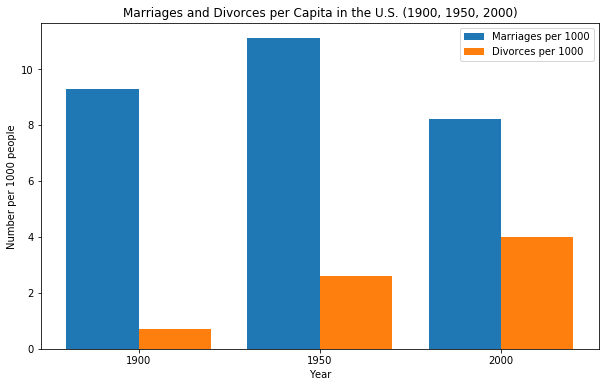

In [44]:
# Set the position of the bars on the x-axis
positions = range(len(df))

plt.figure(figsize=(10, 6))

# Create a bar for marriages
plt.bar(positions, df['Marriages_per_1000'], width=0.4, label='Marriages per 1000', align='center')

# Create a bar for divorces
plt.bar([p + 0.4 for p in positions], df['Divorces_per_1000'], width=0.4, label='Divorces per 1000', align='center')

# Add the labels
plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks([p + 0.2 for p in positions], df['Year'])

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Que8

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data = {
    'Actor': ['Actor A', 'Actor B', 'Actor C', 'Actor D', 'Actor E'],  # Replace with actual actor names
    'Kill_Count': [100, 150, 200, 250, 300]  # Replace with actual kill counts
}
df = pd.DataFrame(data)
df = df.sort_values(by='Kill_Count', ascending=False)

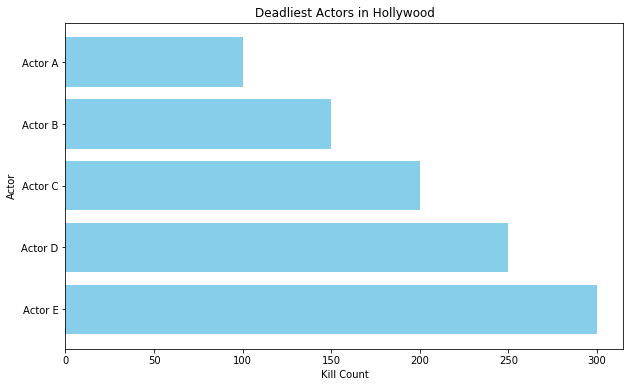

In [47]:
plt.figure(figsize=(10, 6))

# Create the horizontal bar chart
plt.barh(df['Actor'], df['Kill_Count'], color='skyblue')

# Add the labels
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Display the plot
plt.show()

# Que9

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
data = {
    'Category': ['Assassinated', 'Not Assassinated'],
    'Count': [62, 158]  # Replace these values with your actual data
}
df = pd.DataFrame(data)

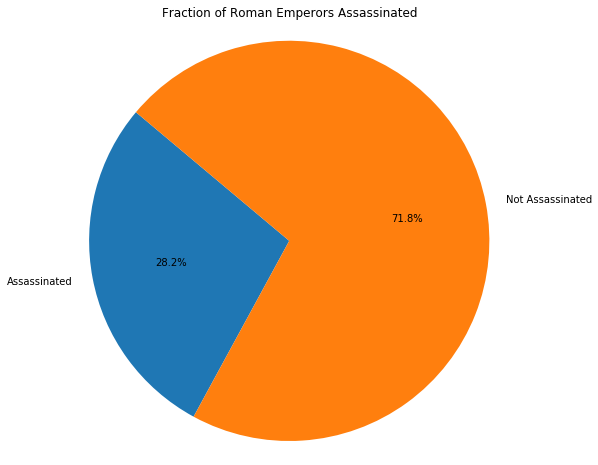

In [50]:
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(df['Count'], labels=df['Category'], autopct='%1.1f%%', startangle=140)

# Ensure the pie chart is a circle
plt.axis('equal')

# Add title
plt.title('Fraction of Roman Emperors Assassinated')

# Display the chart
plt.show()

# Que10

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
    'Arcade_Revenue': [1.5, 1.6, 1.7, 1.8, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3],  # Replace with actual revenue data
    'CS_PhDs_Awarded': [800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250]  # Replace with actual PhD data
}
df = pd.DataFrame(data)

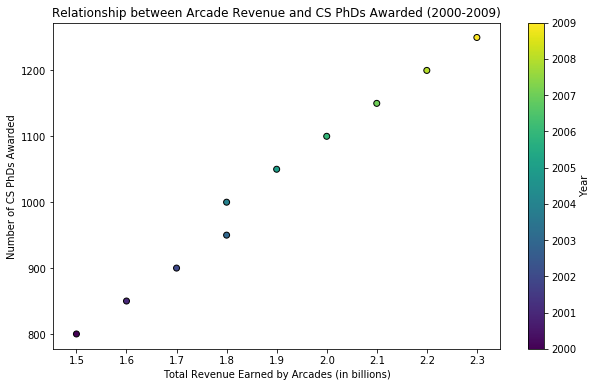

In [53]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['Arcade_Revenue'], df['CS_PhDs_Awarded'], c=df['Year'], cmap='viridis', edgecolor='k')

# Add the labels
plt.xlabel('Total Revenue Earned by Arcades (in billions)')
plt.ylabel('Number of CS PhDs Awarded')
plt.title('Relationship between Arcade Revenue and CS PhDs Awarded (2000-2009)')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Year')

# Display the plot
plt.show()